# TP 6: schémas implicites

In [1]:
import numpy as np # donne acces a la librairie numpy, et definit l'abbreviation np
import scipy        # donne acces aux librairies scipy, scipy.linalg et scipy.integrate
import scipy.linalg
import scipy.integrate
import matplotlib.pyplot as plt # donne acces a la librairie matplotlib.pyplot, et definit l'abbreviation plt
import math     # donne acces aux fonctions et constantes mathematiques


## Exercice 1.
Considérons le problème suivant :
$$
\begin{cases}
\dot{y}(t) = -\lambda y + 1 + \lambda t \\
y(0) = y_{in}
\end{cases}
\tag{1}
$$
modélisant une réaction chimique. Dans ce type de phénomène, plusieurs échelles de temps cohabitent, certaines réactions étant très rapides, tandis que d'autres sont très lentes. On parle de problèmes lents-rapides.
On fixera le temps final $T = 1$, $y_{in} = 2$ et $\lambda = 1000$.

La solution exacte s'écrit :
$$
y(t) = y_{in}e^{-\lambda t} + t, \qquad \forall t \in \mathbb{R}^+
$$

#### 1. a)
Programmer une fonction $\texttt{solexa(t)}$ qui retourne la valeur de la solution exacte à l'instant t. Les paramètres $\lambda$ et $y_0$ seront défini en dehors de la fonction. 

In [7]:
lam= 1000
def solexa(t, y0):
    y = y0 * np.exp(-lam *t) + t
    return y


T=1
t0=0
y0=2
N=100
TPS=np.linspace(t0,T,10)
print(solexa(TPS,y0))

[2.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]


#### 1.b)
Programmer la fonction second membre $\texttt{f(y,t)}$.

In [8]:
def f(y, t):
    x = -lam * y + 1 + lam * t
    return x

### Rappel : schéma d'Euler explicite
On discrétise l'intervalle $[t_0, t_0 + T]$ en $N$ sous-intervalles.

On as donc $\Delta t = \frac{T-t0}{N}$. 

Soit $y_n \simeq y(t_n)$, $\forall n = 0, \ldots, N$, avec $t_n = t_0 + n\Delta t$.

Le schéma d'Euler explicite s'écrit :
$$
\begin{cases}
y_0 = y_{in} & \\
y_{n+1} = y_n + \Delta t f(y_n,t_n) & \forall n = 1, \ldots, N
\end{cases}
$$

#### 2.a)
Programmer une fonction $\texttt{EulerExplicite(t0, x0, T, N, f)}$ qui calcule une solution approchée du problème (1) avec la méthode d'Euler explicite. 

In [19]:
def EulerExplicite(t0,x0,T,N,f):
    h=T/(N+1)
    t_=np.linspace(t0,T,N+1)
    
    if np.size(x0)==1: 
        x0 = np.array([float(x0)])
        
    # initialisation
    x_ = np.zeros((len(t_),len(x0))) 
    x_[0] = x0
    
    for i in range(1,len(t_)) :
        x_[i] = x_[i-1] + h* f(x_[i-1],t_[i-1])
    return t_, x_

#### 2.b)
Tracer sur un même graphe la solution exacte et la solution numérique pour plusieurs valeurs de $N$. À partir de quel $N$ a-t-on une "bonne approximation" ? Pour pouvoir comparer les solutions avec  des cas où la solution numérique "explose" on limitera l'échelle des ordonnées avec la commande plt.ylim([y_min,y_max]), avec [y_min,y_max] calibré pour bien représenter la solution exacte.
De la même manièe on pourra "zoomer" au voisinage de l'origine en limitant l'échelle des abscisses avec la commande plt.xlim([0,0.1])

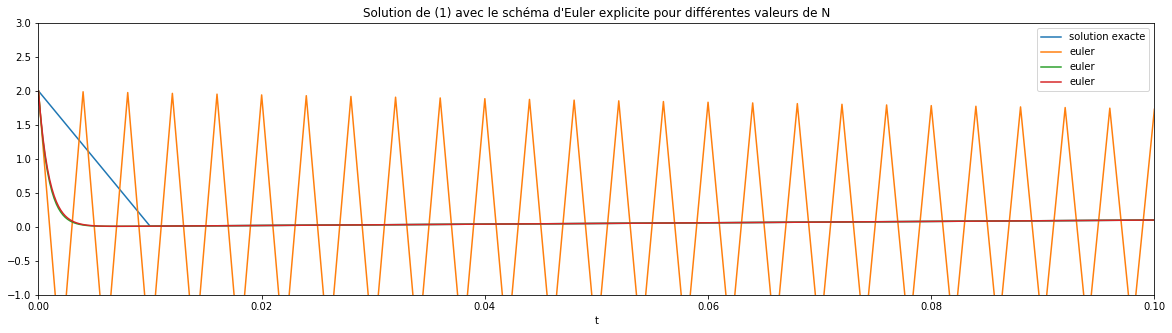

In [36]:
lam = 1000
t0=0
x0=2
T = 1.
N=100
fig, ax = plt.subplots(figsize=(20,5))
t_ = np.linspace(t0,T,N+1)

ax.plot(t_, solexa(t_,x0), label='solution exacte')
N_ = [500,1000,1000] #choisir des valeurs de N
for N in N_:
    TPS, EE = EulerExplicite(t0,x0,T,N,f)
    ax.plot(TPS, EE, label= 'euler')
    ax.legend()
    plt.xlabel('t')
    plt.title('Solution de (1) avec le schéma d\'Euler explicite pour différentes valeurs de N')
    
plt.ylim([-1,3])
plt.xlim([0.0,0.1])
plt.show()

#### 2.c)
Refaire l'experience avec $\lambda = 100$.  À partir de quel $N$ a-t-on une "bonne approximation" cette fois ?

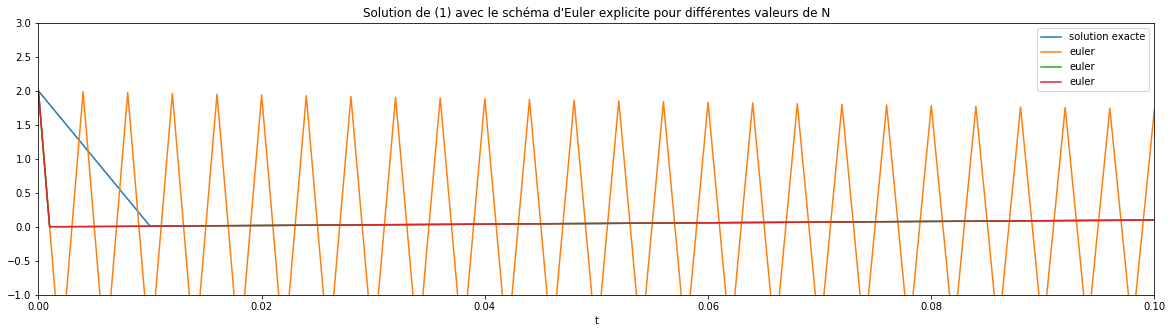

In [37]:
lam = 100
t0=0
x0=2
T = 1.
N=100
fig, ax = plt.subplots(figsize=(20,5))
t_ = np.linspace(t0,T,N+1)

ax.plot(t_, solexa(t_,x0), label='solution exacte')
N_ = [500,1000,1000] #choisir des valeurs de N
for N in N_:
    TPS, EE = EulerExplicite(t0,x0,T,N,f)
    ax.plot(TPS, EE, label= 'euler')
    ax.legend()
    plt.xlabel('t')
    plt.title('Solution de (1) avec le schéma d\'Euler explicite pour différentes valeurs de N')
    
plt.ylim([-1,3])
plt.xlim([0.0,0.1])
plt.show()

### Schéma d'Euler implicite
Avec les mêmes notations que celles utilisées au point précédent, le schéma d'Euler implicite s'écrit :
$$
\begin{cases}
y_0 = y_{in} & \\
y_{n+1} = y_n + \Delta t f(y_{n+1},t_{n+1}) & \forall n = 1, \ldots, N
\end{cases}
$$

Comme le nom du schéma l'indique, $y_{n+1}$ est ici défini de façon implicite.

Pour pouvoir le calculer, il faut définir une fonction auxiliaire :
$$
g(y, y_n, t_{n+1}, \Delta t, f) = y - y_n - \Delta t f(y,t_{n+1}).
$$

On pourra ainsi calculer $y_{n+1}$ en cherchant les zéros de la fonction $g$.
#### 3.a)
Programmer la fonction $g$.

In [55]:
def g(y, yn,tn1,dt,f):
    x = y-yn-dt*f(y,tn1)
    return x

#### 3.b)
Programmer une fonction $\texttt{EulerImplicite(t0, x0, T, N, f)}$ qui calcule une solution approchée du problème (1) avec la méthode d'Euler implicite. 

On pourra se servir de la fonction $\text{scipy.optimize.fsolve}$ pour calculer les zéros de $g$ :

$ \text{scipy.optimize.fsolve(g, }x_E\text{, args=(args_g))}$, où :
* $g$ est le nom de la fonction dont on cherche les zéros.
* $x_E$ est l'estimation initiale pour la méthode itérative qui calcule les zéros de $g$ (conseil : donner $y$ au pas de temps précédent).
* $\text{args_g}$ est la liste ordonnée des arguments de la fonction $g$ à l'exclusion du premier.

In [125]:
def EulerImplicite(t0,x0,T,N,f):
    dt=T/(N+1)
    t_=np.linspace(t0,T,N+1)
    
    if np.size(x0)==1: 
        x0 = np.array([float(x0)])
    
    x_ = np.zeros((len(t_),len(x0))) 
    x_[0] = x0
    dt=T/(N+1)
    for i in range(1,len(t_)) :
        x_[i] = scipy.optimize.fsolve(g, x_[i-1], args=(x_[i-1],t_[i],dt,f))
    return t_, x_

#### 3.c)
Tracer dans un même graphe la solution analytique, la solution numérique obtenue avec Euler explicite et celle obtenue avec Euler implicite avec le même N. 

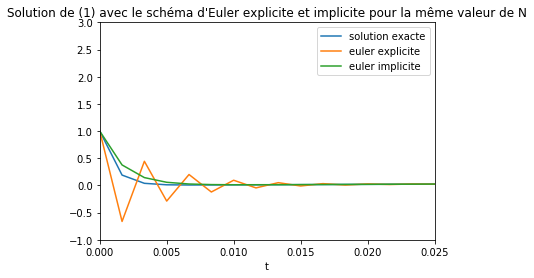

In [126]:
N=600
t0=0
T=1.
x0=1
t_=np.linspace(t0,T,N+1)
plt.plot(t_, solexa(t_,x0), label='solution exacte')
TPS, EE = EulerExplicite(t0,x0,T,N,f)
plt.plot(TPS, EE, label= 'euler explicite')
TPS, EI = EulerImplicite(t0,x0,T,N,f)
plt.plot(TPS, EI, label= 'euler implicite')
plt.legend()
plt.xlabel('t')
plt.title('Solution de (1) avec le schéma d\'Euler explicite et implicite pour la même valeur de N')


plt.ylim([-1,3])
plt.xlim([0.0,0.025])
plt.show()

### Schéma de Crank-Nicolson
Avec les mêmes notations que celles utilisées précédemment, le schéma de Crank-Nicolson s'écrit :
$$
\begin{cases}
y_0 = y(0) & \\
y_{n+1} = y_n + \frac{\Delta t}{2}\big(f(y_n,t_n) + f(y_{n+1},t_{n+1})\big) & \forall n = 1, \ldots, N.
\end{cases}
$$

#### 4.a)
Définir une fonction auxiliaire $g_{CN}$, comme fait pour Euler explicite:

Votre réponse ici :

#### 4.b)
Programmer la fonction auxiliaire $g_{CN}$:

In [116]:
def g_CN(y, yn, tn, tn1, dt, f):
    x= y - yn - (dt/2) * (f(yn,tn) + f(y,tn1))
    return x

#### 4.c)
Programmer la méthode de Crank-Nicolson.

In [119]:
def CrankNik(t0,x0,T,N,f):
    dt=T/(N+1)
    t_=np.linspace(t0,T,N+1)
    
    if np.size(x0)==1: 
        x0 = np.array([float(x0)])
    
    x_ = np.zeros((len(t_),len(x0))) 
    x_[0] = x0
    
    for i in range(1,len(t_)) :
        x_[i] = scipy.optimize.fsolve(g_CN, x_[i-1], args=(x_[i-1],t_[i-1],t_[i],dt,f))
    return t_, x_

#### 4.d)
Tracer sur un même graphe la solution exacte et les solutions numérique obtenues avec les trois schémas.

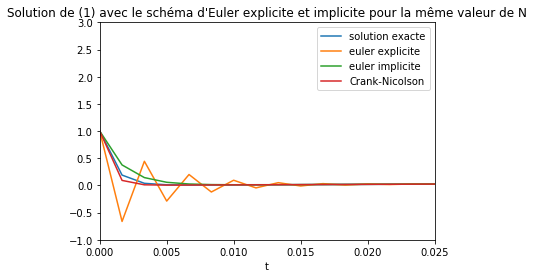

In [127]:
N=600
t0=0
T=1.
x0=1
t_=np.linspace(t0,T,N+1)
plt.plot(t_, solexa(t_,x0), label='solution exacte')

TPS, EE = EulerExplicite(t0,x0,T,N,f)
plt.plot(TPS, EE, label= 'euler explicite')

TPS, EI = EulerImplicite(t0,x0,T,N,f)
plt.plot(TPS, EI, label= 'euler implicite')

TPS, CN = CrankNik(t0,x0,T,N,f)
plt.plot(TPS, CN, label= 'Crank-Nicolson')

plt.legend()
plt.xlabel('t')
plt.title('Solution de (1) avec le schéma d\'Euler explicite et implicite pour la même valeur de N')


plt.ylim([-1,3])
plt.xlim([0.0,0.025])
plt.show()

#### 5)
Utiliser la fonction $\text{process_time}$ pour comparer le temps de résolution des différents schémas programmés. Que remarque-t-on ?

In [121]:
from time import process_time
N =600

t_start = process_time()
TPS, EE = EulerExplicite(t0,x0,T,N,f)
t_end = process_time()
print('Temps de résolution d\'Euler explicite : ',t_end-t_start)

t_start = process_time()
plt.plot(TPS, EI, label= 'euler implicite')
t_end = process_time()
print('Temps de résolution d\'Euler implicite : ',t_end-t_start)

t_start = process_time()
TPS, CN = CrankNik(t0,x0,T,N,f)
t_end = process_time()
print('Temps de résolution de CN : ',t_end-t_start)


Temps de résolution d'Euler explicite :  0.026137292000015577
Temps de résolution d'Euler implicite :  0.03769480899998712
Temps de résolution de CN :  0.15189156799999637


## Exercice 2

Considérons le problème suivant :
$$
\begin{cases}
\dot{y}(t) = \mu y(t) + (1-\mu)\cos(t) - (1+\mu)\sin(t) \\
y(0) = 1.
\end{cases}
\tag{2}
$$

Dans la suite, on prendra $T=10$.

#### 1.a)
Vérifier que la solution exacte ne dépend pas de $\mu$ et qu'elle s'écrit :
$$
y_{ex}(t) = \sin(t)+\cos(t).
$$

#### 1.b)
Programmer la fonction second membre $\text{f2(y,t)}$ :

In [122]:
def solexa2(t, y0):
    y = np.sin(t) + np.cos(t)
    return y

def f2(y,t):
    x=mu * y +(1-mu) * np.cos(t) - (1 + mu) * np.sin(t) 
    return x

#### 1.c)
Pour $\mu \in \{-5, 0.5, 1, 5\}$, tracer les solutions numériques obtenues avec les trois méthodes. Utiliser $\text{subplot}$ pour diviser la figure en $4$ repères.

Les solutions numériques dépendent-elles de $\mu$ ? Pourquoi ? 

Idée : calculer la solution analytique de (2) pour une condition initiale générique $y(0) = y_0$.

Remarque : dans le cas de subplots, les commandes xlim, ymim ne fonctionnent plus, il faut utiliser ax.set_xlim, ax.set_ylim


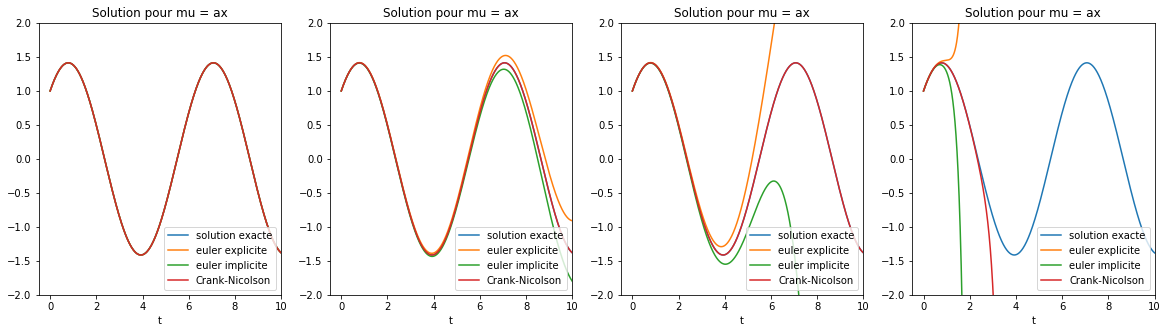

In [128]:
T = 10
N = 2000
x0=1
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4,figsize=(20,5))
dico_mu = {ax1:-5, ax2:0.5, ax3:1, ax4:5}
t_=np.linspace(t0,T,N+1)
for ax in dico_mu:
    mu=dico_mu[ax]
    ax.plot(t_, solexa2(t_,x0), label='solution exacte')

    TPS, EE = EulerExplicite(t0,x0,T,N,f2)
    ax.plot(TPS, EE, label= 'euler explicite')

    TPS, EI = EulerImplicite(t0,x0,T,N,f2)
    ax.plot(TPS, EI, label= 'euler implicite')

    TPS, CN = CrankNik(t0,x0,T,N,f2)
    ax.plot(TPS, CN, label= 'Crank-Nicolson')

    ax.legend()
    ax.set_xlabel('t')
    ax.set_title('Solution pour mu = ax')


    ax.set_ylim([-2,2])
    ax.set_xlim([-0.5,10])

plt.show()
    